# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [1]:
#%pip install --upgrade plotly

## Import Statements

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter
from sklearn.linear_model import LinearRegression  # pip install scikit-learn
from scipy import stats
from pandas.plotting import register_matplotlib_converters
import statistics

## Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
register_matplotlib_converters()

## Load the Data

In [5]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [6]:
df_hh_income.shape # 29322,3
df_pct_poverty.shape # 29329, 3
df_pct_completed_hs.shape  # 29329, 3
df_share_race_city.shape # 29268, 7
df_fatalities.shape # 2535, 14

(2535, 14)

In [7]:
df_hh_income.columns  # 'Geographic Area', 'City', 'Median Income'
df_pct_poverty.columns  # 'Geographic Area', 'City', 'poverty_rate'
df_pct_completed_hs.columns  # 'Geographic Area', 'City', 'percent_completed_hs'
df_share_race_city.columns  # 'Geographic area', 'City', 'share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic'
df_fatalities.columns # 'id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender', 'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level', 'flee', 'body_camera'

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

In [8]:
df_hh_income.isna().values.any()  # true
df_pct_poverty.isna().values.any()  # false
df_pct_completed_hs.isna().values.any()  # false
df_share_race_city.isna().values.any()  # false
df_fatalities.isna().values.any()  # true

np.True_

In [9]:
df_hh_income.duplicated().any()  # false
df_pct_poverty.duplicated().any()  # false
df_pct_completed_hs.duplicated().any()  # false
df_share_race_city.duplicated().any()  # false
df_fatalities.duplicated().any()  # false

np.False_

In [10]:
df_hh_income.info()
df_pct_poverty.info()
df_pct_completed_hs.info()
df_share_race_city.info()
df_fatalities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29322 entries, 0 to 29321
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29322 non-null  object
 1   City             29322 non-null  object
 2   Median Income    29271 non-null  object
dtypes: object(3)
memory usage: 687.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Geographic Area       29329 non-null 

#### Converting columns from object to numeric to facilitate calculations

In [11]:
df_hh_income["Median Income"] = pd.to_numeric(df_hh_income["Median Income"], errors="coerce")
df_hh_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29322 entries, 0 to 29321
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Geographic Area  29322 non-null  object 
 1   City             29322 non-null  object 
 2   Median Income    27385 non-null  float64
dtypes: float64(1), object(2)
memory usage: 687.4+ KB


In [12]:
df_pct_poverty["poverty_rate"] = pd.to_numeric(df_pct_poverty["poverty_rate"], errors="coerce")
df_pct_poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Geographic Area  29329 non-null  object 
 1   City             29329 non-null  object 
 2   poverty_rate     29128 non-null  float64
dtypes: float64(1), object(2)
memory usage: 687.5+ KB


In [13]:
df_pct_completed_hs["percent_completed_hs"] = pd.to_numeric(df_pct_completed_hs["percent_completed_hs"], errors="coerce")
df_pct_completed_hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Geographic Area       29329 non-null  object 
 1   City                  29329 non-null  object 
 2   percent_completed_hs  29132 non-null  float64
dtypes: float64(1), object(2)
memory usage: 687.5+ KB


In [14]:
df_share_race_city["share_white"] = pd.to_numeric(df_share_race_city["share_white"], errors="coerce")
df_share_race_city["share_black"] = pd.to_numeric(df_share_race_city["share_black"], errors="coerce")
df_share_race_city["share_native_american"] = pd.to_numeric(df_share_race_city["share_native_american"], errors="coerce")
df_share_race_city["share_asian"] = pd.to_numeric(df_share_race_city["share_asian"], errors="coerce")
df_share_race_city["share_hispanic"] = pd.to_numeric(df_share_race_city["share_hispanic"], errors="coerce")
df_share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Geographic area        29268 non-null  object 
 1   City                   29268 non-null  object 
 2   share_white            29248 non-null  float64
 3   share_black            29248 non-null  float64
 4   share_native_american  29248 non-null  float64
 5   share_asian            29248 non-null  float64
 6   share_hispanic         29248 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.6+ MB


In [15]:
df_fatalities["date"] = pd.to_datetime(df_fatalities["date"], errors="coerce")
df_fatalities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       2535 non-null   int64         
 1   name                     2535 non-null   object        
 2   date                     2535 non-null   datetime64[ns]
 3   manner_of_death          2535 non-null   object        
 4   armed                    2526 non-null   object        
 5   age                      2458 non-null   float64       
 6   gender                   2535 non-null   object        
 7   race                     2340 non-null   object        
 8   city                     2535 non-null   object        
 9   state                    2535 non-null   object        
 10  signs_of_mental_illness  2535 non-null   bool          
 11  threat_level             2535 non-null   object        
 12  flee                     2470 non-

C:\Users\PC\AppData\Local\Temp\ipykernel_9084\2487563976.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_fatalities["date"] = pd.to_datetime(df_fatalities["date"], errors="coerce")


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [16]:
df_hh_income[df_hh_income.isna().any(axis=1)]
# in original csv, was either missing value or '(X)'. After converting column to numberic, all turned into NaN. 1937 rows, replacing Nans with MEDIAN value

,Geographic Area,City,Median Income
44,AL,Benton town,NaN
56,AL,Bon Secour CDP,NaN
57,AL,Boykin CDP,NaN
65,AL,Bristow Cove CDP,NaN
71,AL,Bucks CDP,NaN
...,...,...,...
29312,WY,Washam CDP,NaN
29313,WY,Westview Circle CDP,NaN
29315,WY,Whiting CDP,NaN
29317,WY,Woods Landing-Jelm CDP,NaN


In [17]:
state_medians = df_hh_income.groupby("Geographic Area")["Median Income"].median()
state_medians.head()

Geographic Area
AK   50,000.00
AL   38,304.00
AR   33,750.00
AZ   39,000.00
CA   54,667.00
Name: Median Income, dtype: float64

In [18]:
df_hh_income["Median Income"] = df_hh_income["Median Income"].fillna(
    df_hh_income["Geographic Area"].map(state_medians)
)
df_hh_income["Median Income"].isna().sum() # 0, no nans

np.int64(0)

In [19]:
df_fatalities[df_fatalities.isna().any(axis=1)] # 281 row

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
59,110,William Campbell,2015-01-25,shot,gun,59.00,M,NaN,Winslow,NJ,False,attack,Not fleeing,False
124,584,Alejandro Salazar,2015-02-20,shot,gun,NaN,M,H,Houston,TX,False,attack,Car,False
241,244,John Marcell Allen,2015-03-30,shot,gun,54.00,M,NaN,Boulder City,NV,False,attack,Not fleeing,False
266,534,Mark Smith,2015-09-04,shot and Tasered,vehicle,54.00,M,NaN,Kellyville,OK,False,attack,Other,False
340,433,Joseph Roy,2015-07-05,shot,knife,72.00,M,NaN,Lawrenceville,GA,True,other,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2528,2812,Alejandro Alvarado,2017-07-27,shot,knife,NaN,M,H,Chowchilla,CA,False,attack,Not fleeing,False
2529,2819,Brian J. Skinner,2017-07-28,shot,knife,32.00,M,NaN,Glenville,NY,True,other,Not fleeing,False
2530,2822,Rodney E. Jacobs,2017-07-28,shot,gun,31.00,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,2017-07-28,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False


In [20]:
df_fatalities["race"] = df_fatalities["race"].fillna(value="NA")
df_fatalities["race"].isna().sum() # 0

np.int64(0)

In [21]:
df_fatalities["armed"] = df_fatalities["armed"].fillna(value="NA")
df_fatalities["armed"].isna().sum()  # 0

np.int64(0)

In [22]:
df_fatalities["flee"] = df_fatalities["flee"].fillna(value="NA")
df_fatalities["flee"].isna().sum()  # 0

np.int64(0)

In [23]:
df_fatalities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       2535 non-null   int64         
 1   name                     2535 non-null   object        
 2   date                     2535 non-null   datetime64[ns]
 3   manner_of_death          2535 non-null   object        
 4   armed                    2535 non-null   object        
 5   age                      2458 non-null   float64       
 6   gender                   2535 non-null   object        
 7   race                     2535 non-null   object        
 8   city                     2535 non-null   object        
 9   state                    2535 non-null   object        
 10  signs_of_mental_illness  2535 non-null   bool          
 11  threat_level             2535 non-null   object        
 12  flee                     2535 non-

In [24]:
df_fatalities[df_fatalities.isna().any(axis=1)]  # 145 row, 'age' cannot autofill logically, so will drop (3.03% of data)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
124,584,Alejandro Salazar,2015-02-20,shot,gun,NaN,M,H,Houston,TX,False,attack,Car,False
658,789,Roger Albrecht,2015-08-29,shot,knife,NaN,M,W,San Antonio,TX,False,other,Not fleeing,False
707,839,Lawrence Price,2015-09-17,shot,gun,NaN,M,W,Brodhead,KY,False,attack,Not fleeing,False
769,908,Jason Day,2015-12-10,shot,gun,NaN,M,B,Lawton,OK,False,attack,Not fleeing,False
802,1283,John Tozzi,2015-10-24,shot,gun,NaN,M,NA,New Paltz,NY,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2488,2773,TK TK,2017-12-07,shot,blunt object,NaN,M,NA,Grover Beach,CA,False,other,Not fleeing,False
2496,2781,TK TK,2017-07-15,shot,gun,NaN,M,NA,Arlington,TX,False,attack,Foot,False
2521,2806,TK TK,2017-07-26,shot,gun,NaN,M,NA,San Antonio,TX,False,attack,Not fleeing,False
2528,2812,Alejandro Alvarado,2017-07-27,shot,knife,NaN,M,H,Chowchilla,CA,False,attack,Not fleeing,False


In [25]:
df_fatalities.dropna(subset=['age'], axis=0, inplace=True, ignore_index=True)
df_fatalities.isna().values.any() # False
df_fatalities.info() # 2458, 14

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2458 entries, 0 to 2457
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       2458 non-null   int64         
 1   name                     2458 non-null   object        
 2   date                     2458 non-null   datetime64[ns]
 3   manner_of_death          2458 non-null   object        
 4   armed                    2458 non-null   object        
 5   age                      2458 non-null   float64       
 6   gender                   2458 non-null   object        
 7   race                     2458 non-null   object        
 8   city                     2458 non-null   object        
 9   state                    2458 non-null   object        
 10  signs_of_mental_illness  2458 non-null   bool          
 11  threat_level             2458 non-null   object        
 12  flee                     2458 non-

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [26]:
poverty_state = df_pct_poverty.groupby("Geographic Area").median("poverty_rate") # second best measure if cant calc weighted mean
poverty_state.head()

,poverty_rate
Geographic Area,
AK,14.95
AL,19.10
AR,22.30
AZ,20.35
CA,13.40


In [27]:
poverty_state = poverty_state.reset_index()
poverty_state.columns = ["state", "poverty_rate"]
poverty_state = poverty_state.sort_values("poverty_rate", ascending=True)

In [28]:
poverty_state_graph = px.bar(
    poverty_state,
    x="poverty_rate",
    y="state",
    orientation="h",
    title="Poverty rate by state",
    text="poverty_rate",
)

poverty_state_graph.update_layout(
    height=1200,
    yaxis_title="State",
    xaxis_title="Poverty rate, %",
)

poverty_state_graph.update_traces(texttemplate="%{x:.2f}")

poverty_state_graph.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [29]:
hs_grad_state = df_pct_completed_hs.groupby("Geographic Area").median("percent_completed_hs")
hs_grad_state.head()

,percent_completed_hs
Geographic Area,
AK,87.60
AL,81.15
AR,81.10
AZ,84.15
CA,87.50


In [30]:
hs_grad_state = hs_grad_state.reset_index()
hs_grad_state.columns = ["state", "hs_graduation_rate"]
hs_grad_state = hs_grad_state.sort_values("hs_graduation_rate", ascending=False)

In [31]:
hs_grad_state.head()

,state,hs_graduation_rate
19,MA,93.90
50,WY,93.70
6,CT,93.20
44,UT,93.15
31,NJ,92.60


In [32]:
hs_grad_state_graph = px.bar(
    hs_grad_state,
    x="hs_graduation_rate",
    y="state",
    orientation="h",
    title="High School graduation rate by state",
    text="hs_graduation_rate",
)

hs_grad_state_graph.update_layout(
    height=1200,
    yaxis_title="State",
    xaxis_title="Graduation rate, %",
)

hs_grad_state_graph.update_traces(texttemplate="%{x:.2f}")

hs_grad_state_graph.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

Text(0, 0.5, 'High School graduation rate')

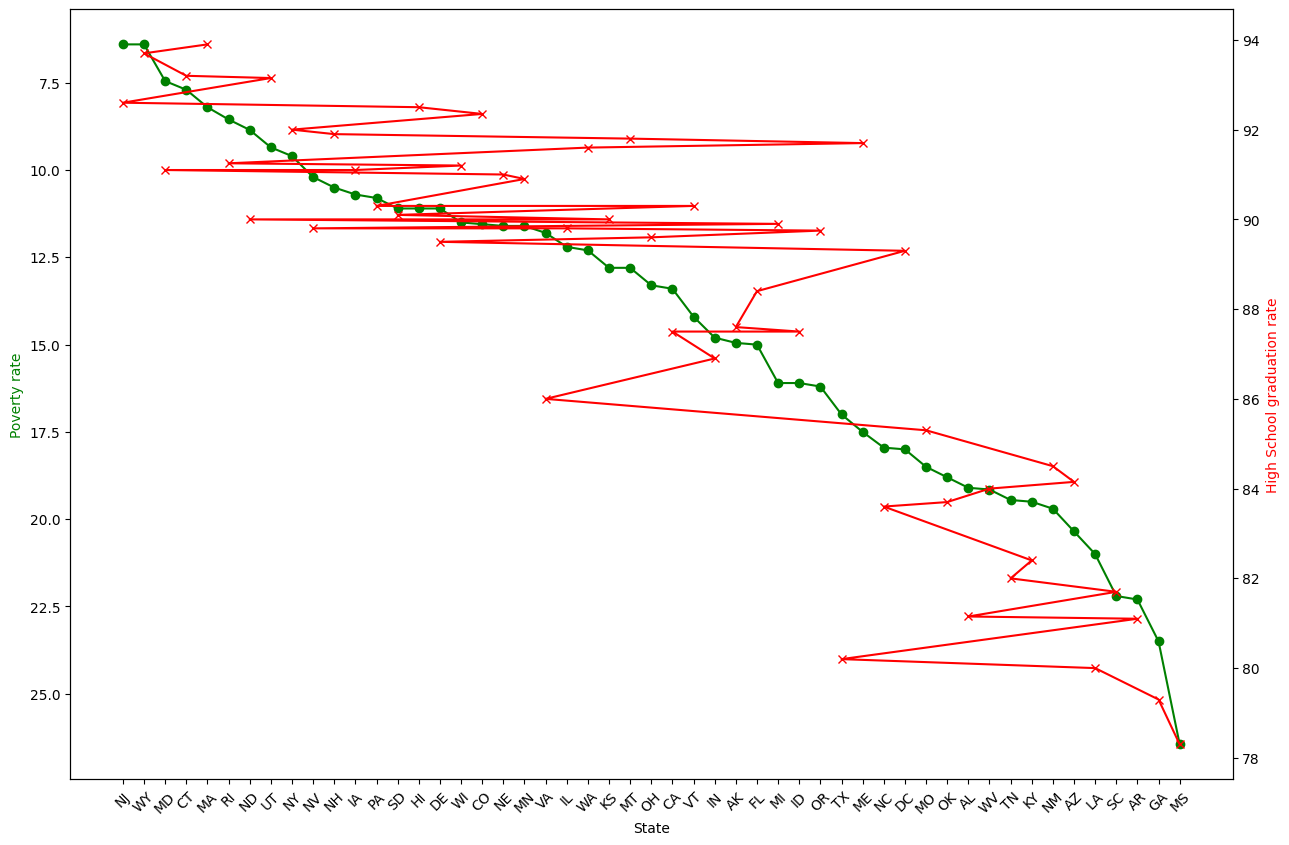

In [33]:
fig, ax1 = plt.subplots(figsize=(15, 10))

ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot(
    poverty_state["state"],
    poverty_state["poverty_rate"],
    color="g",
    marker="o",
    label="Poverty rate",
)
ax1.invert_yaxis()
ax1.tick_params(axis="x", labelrotation=45)
ax2.plot(
    hs_grad_state["state"],
    hs_grad_state["hs_graduation_rate"],
    color="r",
    marker="x",
    label="High School graduation rate",
)
ax1.set_xlabel("State")
ax1.set_ylabel("Poverty rate", color="g")
ax2.set_ylabel("High School graduation rate", color="r")

We definitely see a relationship between those 2: lower the hs_drag_rate, higher would be the poverty_rate in the region

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

In [34]:
# merging as the data for graph should come from one origin
poverty_hs_grad_state = pd.merge(
    poverty_state[["state", "poverty_rate"]],
    hs_grad_state[["state", "hs_graduation_rate"]],
    on="state",
)
poverty_hs_grad_state.head()

,state,poverty_rate,hs_graduation_rate
0,NJ,6.40,92.60
1,WY,6.40,93.70
2,MD,7.45,91.10
3,CT,7.70,93.20
4,MA,8.20,93.90


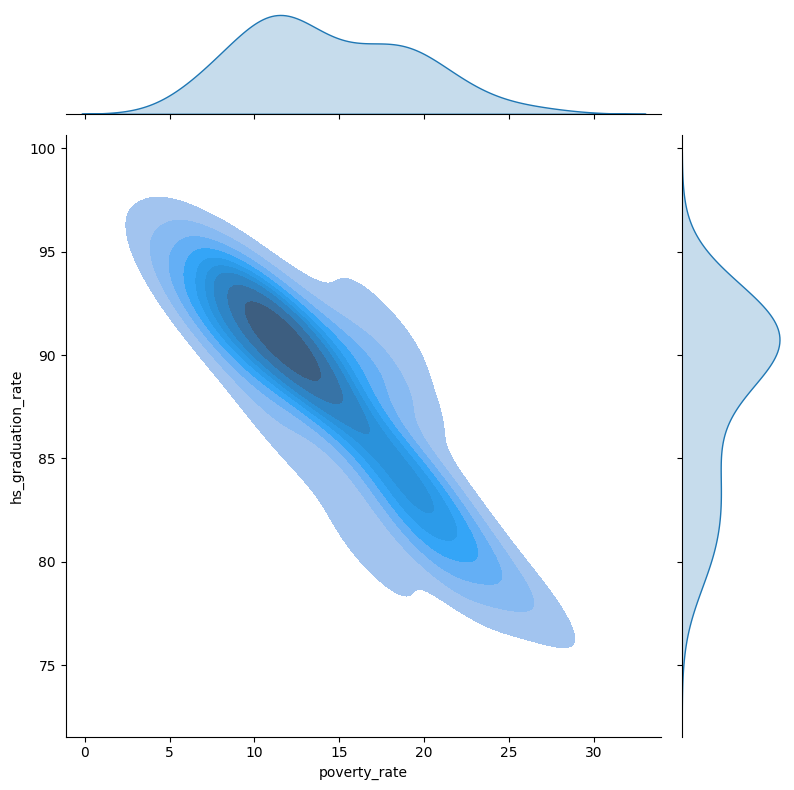

In [35]:
sns.jointplot(
    data=poverty_hs_grad_state,
    x="poverty_rate",
    y="hs_graduation_rate",
    kind="kde",  # KDE density plot
    fill=True,
    height=8,
)
plt.show()

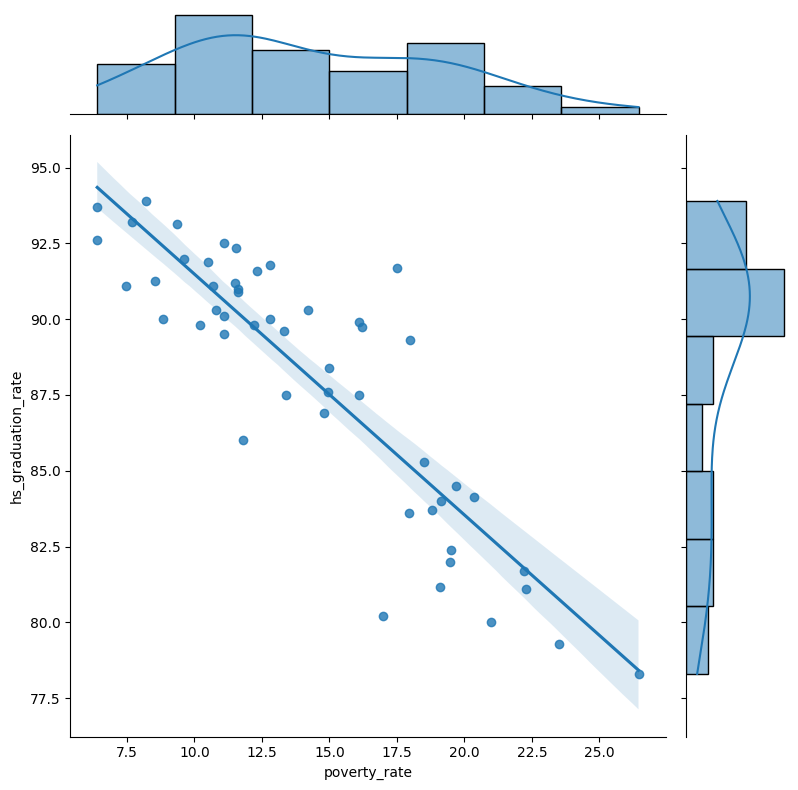

In [36]:
sns.jointplot(
    data=poverty_hs_grad_state,
    x="poverty_rate",
    y="hs_graduation_rate",
    kind="reg",  # scatter + regression
    height=8,
)
plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

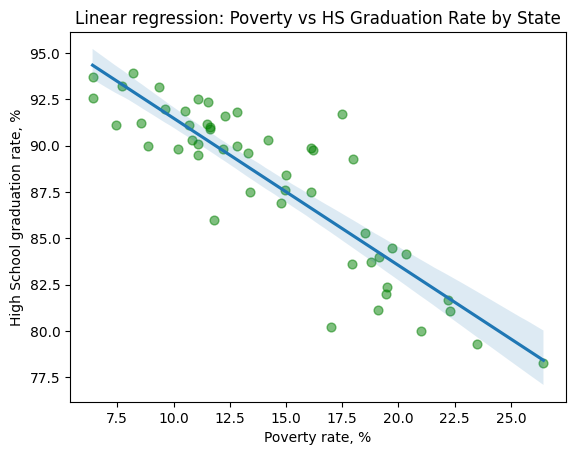

In [37]:
sns.regplot(
    data=poverty_hs_grad_state,
    x="poverty_rate",
    y="hs_graduation_rate", scatter_kws={'color': 'g', 'alpha': 0.5, 's': 40, 'marker': 'x'}
)
plt.xlabel("Poverty rate, %")
plt.ylabel("High School graduation rate, %")
plt.title("Linear regression: Poverty vs HS Graduation Rate by State")
plt.show()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [38]:
# Median is more logic however is misleading, as there are many extremes. The resulting data not coming any close to 100%, 
# which we need to create stacked bar chart. Therefore using 'mean' below, data more reliable / presentable.

# race_columns = ["share_white", "share_black", "share_native_american", "share_asian", "share_hispanic"]
# race_state = df_share_race_city.groupby("Geographic area")[race_columns].median()
# race_state = race_state.reset_index()
# race_state.rename(columns={"Geographic area": "state"}, inplace=True)
# race_state_long = race_state.melt(
#     id_vars="state", value_vars=race_columns, var_name="race", value_name="share"
# )

# race_state.head()

In [39]:
race_columns_mean = [
    "share_white",
    "share_black",
    "share_native_american",
    "share_asian",
    "share_hispanic",
]
race_state_mean = df_share_race_city.groupby("Geographic area")[race_columns_mean].mean()
race_state_mean = race_state_mean.reset_index()
race_state_mean.rename(columns={"Geographic area": "state"}, inplace=True)
race_state_mean_long = race_state_mean.melt(
    id_vars="state", value_vars=race_columns_mean, var_name="race", value_name="share"
)

race_state_mean.head()
race_state_mean_long.head()

,state,race,share
0,AK,share_white,45.65
1,AL,share_white,72.51
2,AR,share_white,78.45
3,AZ,share_white,59.93
4,CA,share_white,71.87


In [ ]:
race_state_graph = px.bar(
    race_state_mean_long,
    x="share",
    y="state",
    title="Population race distribution by state",
    color="race",
    orientation="h",
    width=1200,
    height=1000,
)
race_state_graph.update_layout(
    yaxis={"categoryorder": "total ascending"},
    xaxis_title="Share of citizens of certain race",
    yaxis_title="State",
    barmode="stack",
)
race_state_graph.show()

# Create Chart by of People Killed by Race

In [41]:
gender_race_state = (
    df_fatalities.groupby(
        ["gender", "race", "state"],
        as_index=False,
    )["age"]
    .count()
    .rename(columns={"age": "count"})
)
gender_race_state

,gender,race,state,count
0,F,A,CA,1
1,F,B,AZ,1
2,F,B,CA,7
3,F,B,DC,1
4,F,B,FL,2
...,...,...,...,...
252,M,W,VT,2
253,M,W,WA,29
254,M,W,WI,28
255,M,W,WV,19


In [42]:
sunburst = px.sunburst(
    gender_race_state,
    path=["gender", "race", "state"],
    values="count",
    color="count",
    color_continuous_scale="Viridis",
    width=1200,
    height=1000,
    title="Sunburst of deaths by police (gender, race, state)",
)

sunburst.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [43]:
by_gender = df_fatalities.gender.value_counts()
by_gender

gender
M    2354
F     104
Name: count, dtype: int64

In [44]:
by_gender = by_gender.reset_index()
by_gender.columns = ["gender", "count"]

fig = px.pie(
    by_gender, names="gender", values="count", title="Deaths by gender", hole=0.6
)
fig.update_traces(textposition="outside", textinfo="percent+label")
fig.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

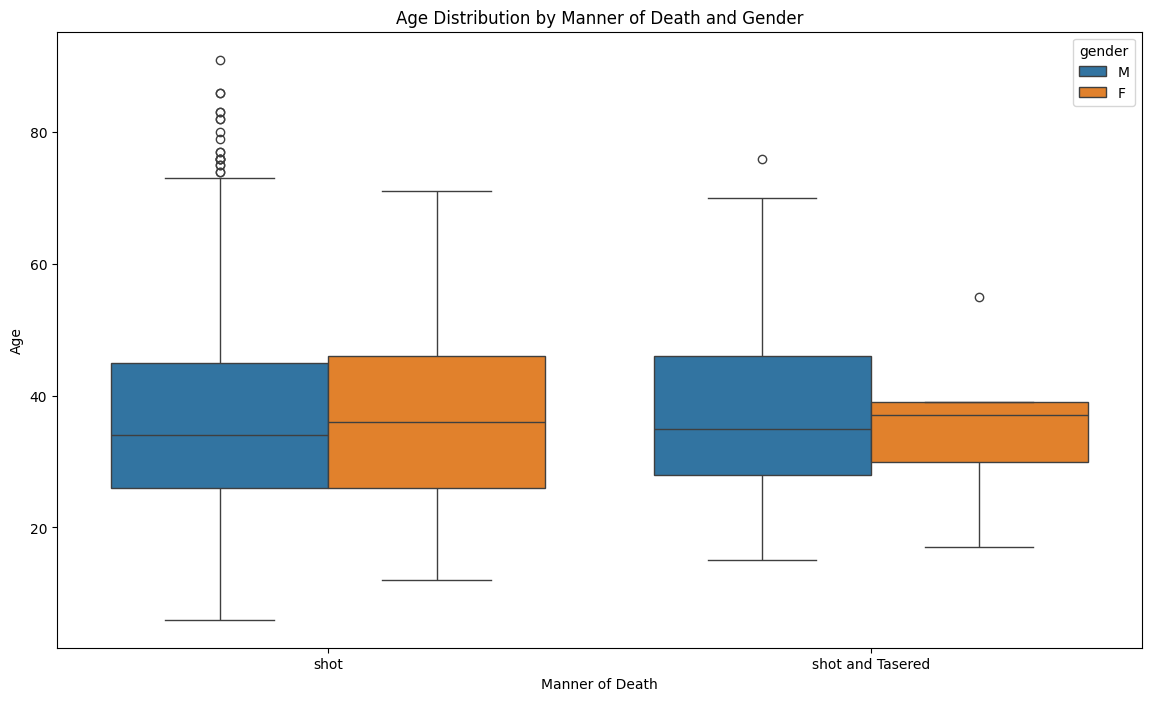

In [45]:
plt.figure(figsize=(14, 8))

sns.boxplot(data=df_fatalities, x="manner_of_death", y="age", hue="gender")

plt.xlabel("Manner of Death")
plt.ylabel("Age")
plt.title("Age Distribution by Manner of Death and Gender")
plt.show()

### dividing died people into age groups

In [46]:
age_bins = list(range(0, 100, 10))
df_fatalities["age_bin"] = pd.cut(
    df_fatalities["age"],
    bins=age_bins,
    right=False,
)
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_bin
0,3,Tim Elliot,2015-02-01,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False,"[50, 60)"
1,4,Lewis Lee Lembke,2015-02-01,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False,"[40, 50)"
2,5,John Paul Quintero,2015-03-01,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False,"[20, 30)"
3,8,Matthew Hoffman,2015-04-01,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False,"[30, 40)"
4,9,Michael Rodriguez,2015-04-01,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False,"[30, 40)"


In [47]:
df_fatalities.flee.value_counts()
df_fatalities.armed.value_counts().head(30)
df_fatalities.body_camera.value_counts()
df_fatalities.threat_level.value_counts()

threat_level
attack          1563
other            745
undetermined     150
Name: count, dtype: int64

### multiple factors tree

In [48]:
camera_threat_flee_armed = (
    df_fatalities.groupby(
        ["body_camera", "threat_level", "flee", "armed"],
        as_index=False,
    )["age"]
    .count()
    .rename(columns={"age": "count"})
)
camera_threat_flee_armed

,body_camera,threat_level,flee,armed,count
0,False,attack,Car,blunt object,1
1,False,attack,Car,box cutter,1
2,False,attack,Car,gun,152
3,False,attack,Car,knife,3
4,False,attack,Car,machete,1
...,...,...,...,...,...
225,True,undetermined,NA,unknown weapon,1
226,True,undetermined,Not fleeing,gun,4
227,True,undetermined,Not fleeing,pole,1
228,True,undetermined,Not fleeing,unarmed,2


In [49]:
sunburst1 = px.sunburst(
    camera_threat_flee_armed,
    path=["body_camera", "threat_level", "flee", "armed"],
    values="count",
    color="count",
    color_continuous_scale="Viridis",
    width=1200,
    height=1000,
    title="Sunburst of deaths by police (camera, threat, flee, armed)",
)

sunburst1.show()

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [50]:
df_fatalities.armed.value_counts().head()

armed
gun             1356
knife            357
vehicle          172
unarmed          170
undetermined     112
Name: count, dtype: int64

In [51]:
df_fatalities.loc[
    ~df_fatalities["armed"].isin(["unarmed", "undetermined"]),
    "armed",
] = "armed_by_smth"
# ~df_fatalities["armed"].isin.. - negates the condition, means EVRYTHING from that column that is NOT 'unarmed' or 'undetermined', must be changed

df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_bin
0,3,Tim Elliot,2015-02-01,shot,armed_by_smth,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False,"[50, 60)"
1,4,Lewis Lee Lembke,2015-02-01,shot,armed_by_smth,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False,"[40, 50)"
2,5,John Paul Quintero,2015-03-01,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False,"[20, 30)"
3,8,Matthew Hoffman,2015-04-01,shot,armed_by_smth,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False,"[30, 40)"
4,9,Michael Rodriguez,2015-04-01,shot,armed_by_smth,39.00,M,H,Evans,CO,False,attack,Not fleeing,False,"[30, 40)"


In [52]:
by_armed = df_fatalities.armed.value_counts()
by_armed

armed
armed_by_smth    2176
unarmed           170
undetermined      112
Name: count, dtype: int64

In [53]:
by_armed = by_armed.reset_index()
by_armed.columns = ["armed_status", "count"]

fig = px.pie(
    by_armed,
    names="armed_status",
    values="count",
    title="Armed vs unarmed",
    hole=0.6,
    color_discrete_sequence=px.colors.qualitative.Set3,
)
fig.update_traces(textposition="outside", textinfo="percent+label")
fig.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [54]:
age_bin_state = (
    df_fatalities.groupby(["state", "age_bin"]).size().reset_index(name="count")
)

age_bin_state

C:\Users\PC\AppData\Local\Temp\ipykernel_9084\1249210855.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,state,age_bin,count
0,AK,"[0, 10)",0
1,AK,"[10, 20)",1
2,AK,"[20, 30)",4
3,AK,"[30, 40)",7
4,AK,"[40, 50)",3
...,...,...,...
454,WY,"[40, 50)",3
455,WY,"[50, 60)",1
456,WY,"[60, 70)",0
457,WY,"[70, 80)",0


In [56]:
age_bin_state_graph = px.treemap(
    age_bin_state,
    path=["age_bin", "state"],  # hierarchy
    values="count",  # column controlling area of each rectangle
    title="Deaths by age group and state",
)
age_bin_state_graph.show()

In [59]:
under_25_df = df_fatalities[df_fatalities['age'] < 25]
under_25_share = round(len(under_25_df) / len(df_fatalities), 2)
print(f"Share of fatalities under 25 years old is {under_25_share *100}%.")

Share of fatalities under 25 years old is 18.0%.


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

In [61]:
df_fatalities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2458 entries, 0 to 2457
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       2458 non-null   int64         
 1   name                     2458 non-null   object        
 2   date                     2458 non-null   datetime64[ns]
 3   manner_of_death          2458 non-null   object        
 4   armed                    2458 non-null   object        
 5   age                      2458 non-null   float64       
 6   gender                   2458 non-null   object        
 7   race                     2458 non-null   object        
 8   city                     2458 non-null   object        
 9   state                    2458 non-null   object        
 10  signs_of_mental_illness  2458 non-null   bool          
 11  threat_level             2458 non-null   object        
 12  flee                     2458 non-

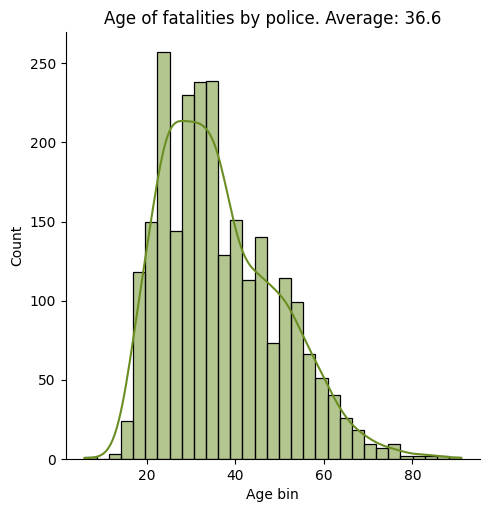

In [66]:
age_bin_graph = sns.displot(
    data=df_fatalities, x="age", kind="hist", kde=True, color="olivedrab"
)
plt.title(f"Age of fatalities by police. Average: {(df_fatalities.age.mean()):.1f}")
plt.xlabel("Age bin")
plt.show()

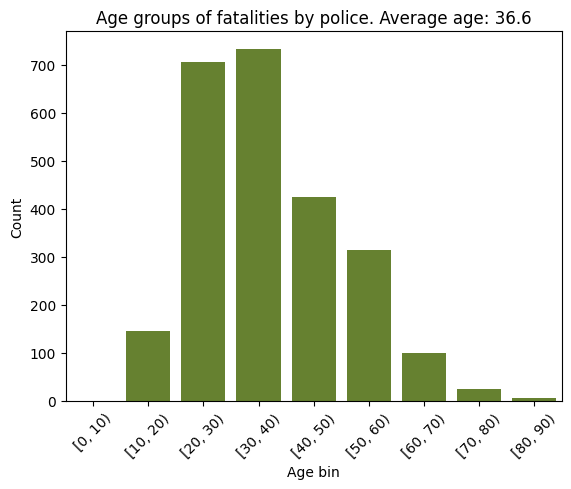

In [67]:
sns.countplot(
    data=df_fatalities,
    x="age_bin",
    color="olivedrab",
    order=sorted(df_fatalities["age_bin"].dropna().unique()),
) # x is non-numerical, so used countplot

plt.title(
    f"Age groups of fatalities by police. Average age: {df_fatalities.age.mean():.1f}"
)
plt.xlabel("Age bin")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

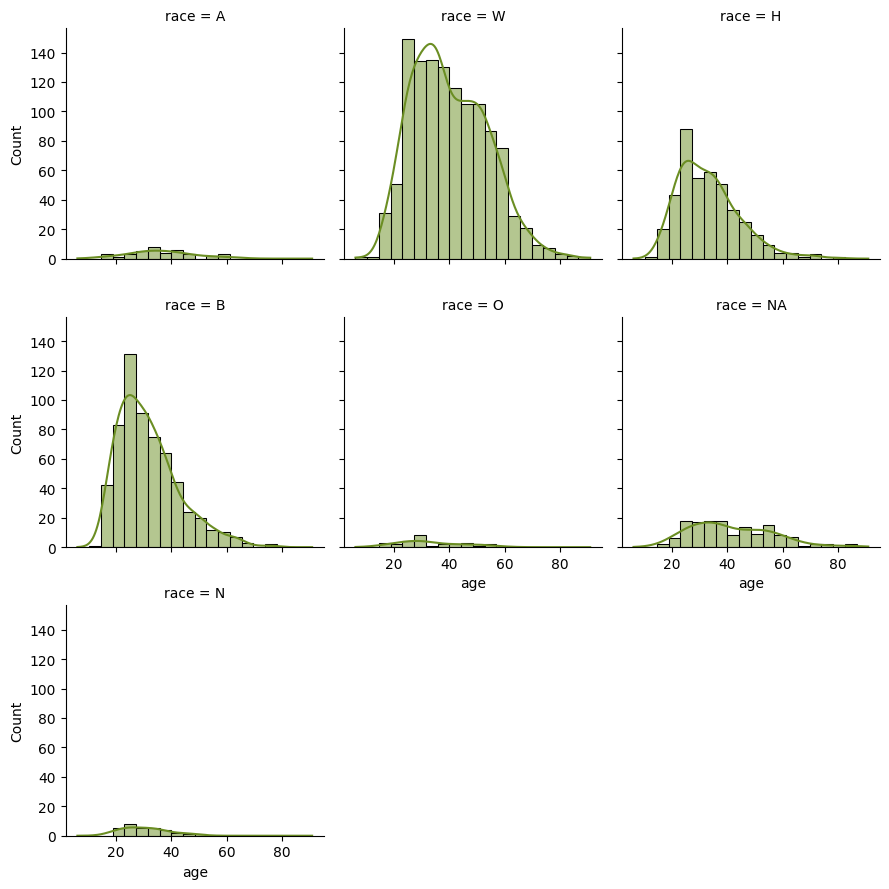

In [68]:
sns.displot(
    data=df_fatalities,
    x="age",
    col="race",
    col_wrap=3,  # 6 races → 2 rows x 3 cols
    kind="hist",
    kde=True,
    color="olivedrab",
    bins=20,
    height=3,
    aspect=1,
)

plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

In [72]:
by_race = df_fatalities.race.value_counts()
by_race

race
W     1192
B      609
H      413
NA     147
A       38
N       31
O       28
Name: count, dtype: int64

In [73]:
by_race = by_race.reset_index()
by_race.columns = ["race", "count"]

by_race_graph = px.pie(
    by_race,
    names="race",
    values="count",
    title="Fatalities race",
    hole=0.6,
    color_discrete_sequence=px.colors.qualitative.Set3,
)
by_race_graph.update_traces(textposition="outside", textinfo="percent+label")
by_race_graph.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [ ]:
by_illness = df_fatalities.signs_of_mental_illness.value_counts()
by_illness = by_illness.reset_index()
by_illness.columns = ["signs_of_mental_illness", "count"]

In [79]:
by_illness_graph = px.pie(
    by_illness,
    names="signs_of_mental_illness",
    values="count",
    title="Fatalities: signs_of_mental_illness",
    hole=0.6,
    color_discrete_sequence=px.colors.qualitative.Set3,
)
by_illness_graph.update_traces(textposition="outside", textinfo="percent+label")
by_illness_graph.show()

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [86]:
by_cities = df_fatalities.city.value_counts()
by_cities = by_cities.reset_index()
by_cities.columns = ["city", "count"]

In [105]:
top_10_cities = by_cities[:10]
top_10_cities = top_10_cities.sort_values(by="count", ascending=True)

In [106]:
top_10_cities_graph = px.bar(
    top_10_cities,
    x="count",
    y="city",
    orientation="h",
    title="Police fatalities by city",
    text="count",
)

top_10_cities_graph.update_layout(
    height=600,
    yaxis_title="City",
    xaxis_title="Count of fatalities",
)

top_10_cities_graph.update_traces(texttemplate="%{x}")

top_10_cities_graph.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

##### there is a mismatch of race in 2 given datasets:
 - population race breakdown: asian, white, black, native american, hispanic
 - fatalities race breakdown: A (asian?), W(white), B (black), H(hispanic), O(other?), N(native american or nonhispanic?), NA(data not provided).
 THerefore is hard to make parralels between the sets without clear legend.

In [ ]:
top_10_city_names = top_10_cities["city"]
df_fatalities_top_cities = df_fatalities[df_fatalities['city'].isin(top_10_city_names)]

race_city_counts = (
    df_fatalities_top_cities.groupby(["city", "race"]).size().reset_index(name="count")
)

city_totals = race_city_counts.groupby("city")["count"].sum().reset_index(name="total")

race_city_share = race_city_counts.merge(city_totals, on="city")
race_city_share["share"] = race_city_share["count"] / race_city_share["total"]


race_city_share

In [ ]:
## option 2 for above code, got same result:
# df_fatalities_top_cities = df_fatalities[df_fatalities['city'].isin(top_10_cities)]
# race_city_share = pd.pivot_table(
#     df_fatalities_top_cities,
#     index="city",
#     columns="race",
#     aggfunc="size",
#     normalize="index",
# ).reset_index()
# race_city_share_long = race_city_share.melt(
#     id_vars="city", var_name="race", value_name="share"
# )
# race_city_share.head()
# race_city_share_long.head()

In [95]:
race_city_graph = px.bar(
    race_city_share,
    x="share",
    y="city",
    title="Population race distribution by city",
    color="race",
    orientation="h",
    width=1200,
    height=1000,
)
race_city_graph.update_layout(
    yaxis={"categoryorder": "total ascending"},
    xaxis_title="Share of citizens of certain race involved in police shoopings",
    yaxis_title="City",
    barmode="stack",
)
race_city_graph.show()

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [ ]:
df_fatalities["year_month"] = df_fatalities["date"].dt.to_period("M")
df_fatalities["year_month"] = df_fatalities["year_month"].dt.to_timestamp()
df_fatalities.head()
monthly_counts = df_fatalities.groupby("year_month").size().reset_index(name="count")
monthly_counts

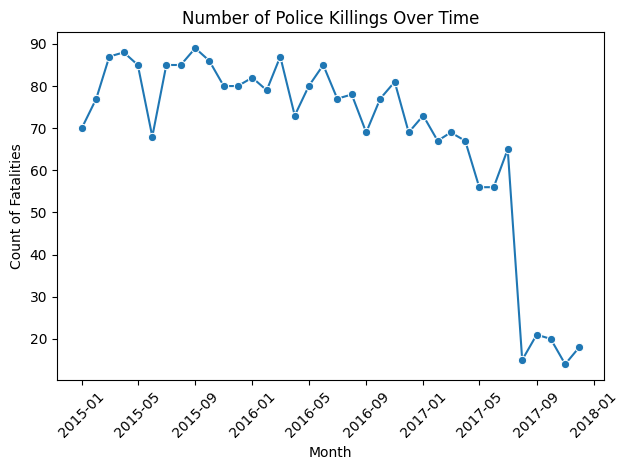

In [118]:
fatalities_count_graph = sns.lineplot(
    data=monthly_counts, x="year_month", y="count", marker="o"
)

plt.title("Number of Police Killings Over Time")
plt.xlabel("Month")
plt.ylabel("Count of Fatalities")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

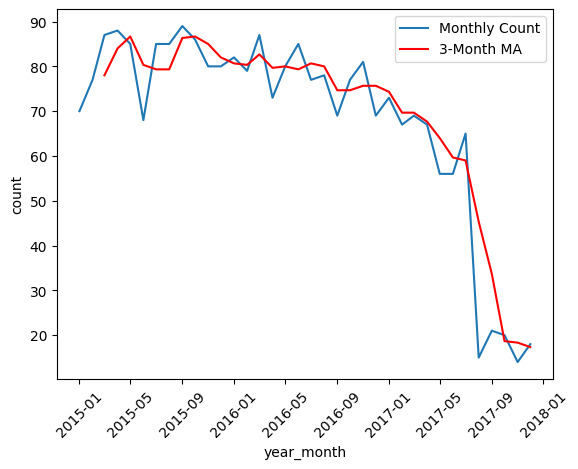

In [119]:
monthly_counts["count_3mo_ma"] = monthly_counts["count"].rolling(3).mean() # ma = monthly avg

sns.lineplot(data=monthly_counts, x="year_month", y="count", label="Monthly Count")
sns.lineplot(
    data=monthly_counts,
    x="year_month",
    y="count_3mo_ma",
    label="3-Month MA",
    color="red",
)
plt.xticks(rotation=45)
plt.show()

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).

##### There has been a drastic drop in police fatalities in Aug 2017. It's most likely due to improved training techniques.